# Almacenamiento y procesamiento masivo de datos - Tarea 3 

**Universidad de los Andes**

**Profesor:** Ignacio Perez<br>
**Alumno:** Cristóbal Griffero C.

### Objetivo

La tarea tres tiene por objetivo profundizar en el uso de notebooks y visualización de datos. Se utilizó el dataset de yelp.

### Preparación

En primer lugar, fue necesario realizar un pre-calculo con [mrjob](https://github.com/Yelp/mrjob) sobre el dataset. El pre-calculo se realizó con el objetivo de obtener un archivo CSV donde se puede encontrar una lista que contiene todos los reviews y la nota para cada categoría. Por ejemplo, el review 4w_BjjcpK8aNx5zbSzyedw se hizo sobre el establecimiento iFEiMJoEqyB9O8OUNSdLzA. A su vez, las categorias de dicho establecimiento son Pubs, Restaurants y Nightlife. El review tiene una calificación de 4 estrellas por lo que esto se transforma en una valoración de 4 estrellas para Pubs, Restaurants y Nightlife. El archivo CSV tiene el siguiente formato:

review_id,category,stars<br>
2aAE1ZVDqMgFDakrl7iRAw,Arts & Entertainment,5<br>
2aAE1ZVDqMgFDakrl7iRAw,Shopping,5<br>
2aAE1ZVDqMgFDakrl7iRAw,Museums,5<br>
2aAE1ZVDqMgFDakrl7iRAw,Art Galleries,5<br>
4OADaU5e2p63-bSPqtyc7w,Arts & Entertainment,3<br>
4OADaU5e2p63-bSPqtyc7w,Shopping,3<br>
4OADaU5e2p63-bSPqtyc7w,Museums,3<br>
...

## Preguntas

### P1

**Visualizar la distribución de las estrellas recibidas por todos los restaurantes en cada categoría.**

En primer lugar, utilizando [pandas](http://pandas.pydata.org), se leyeron los datos desde el CSV generado.

In [1]:
import pandas as pd

data = pd.read_csv('jupyter.csv', sep=',', header=0)

Posteriormente, se obtuvo una lista con todas las categorias que fueron sujetas a algún tipo de review.

In [2]:
categories = []
for review in  data.values:
    if review[1] not in categories:
        categories.append(review[1])
        
print categories

['Restaurants', 'Chinese', 'Breweries', 'Food', 'Doctors', 'Health & Medical', 'Weight Loss Centers', 'Orthopedists', 'Sports Medicine', 'Beauty & Spas', 'Hair Salons', 'Steakhouses', 'Cajun/Creole', 'Breakfast & Brunch', 'Arts & Entertainment', 'Festivals', 'Cosmetics & Beauty Supply', 'Shopping', 'Beer', 'Wine & Spirits', 'Bars', 'American (New)', 'Nightlife', 'Physical Therapy', 'Salad', 'Chicken Wings', 'Pizza', 'Sports Bars', 'American (Traditional)', 'Sandwiches', 'Tires', 'Automotive', 'Wholesale Stores', 'Books', 'Mags', 'Music & Video', 'Convenience Stores', 'Newspapers & Magazines', 'Fast Food', 'Auto Repair', 'Auto Parts & Supplies', 'Gas Stations', 'Diners', 'Lounges', 'Vocational & Technical School', 'Adult Education', 'Specialty Schools', 'Education', 'Colleges & Universities', 'Educational Services', 'Local Services', 'Carpet Cleaning', 'Damage Restoration', 'Handyman', 'Home Services', 'Drywall Installation & Repair', 'Contractors', 'Accessories', 'Shoe Stores', 'Sporti

Con la ayuda de [widgets](http://jupyter.org/widgets.html), se creó un dropdown con el objetivo de poder seleccionar la categoría a visualizar.

In [3]:
import ipywidgets as widgets

In [4]:
selection = widgets.Dropdown(
    options=categories
)

display(selection)

Dropdown(options=('Restaurants', 'Chinese', 'Breweries', 'Food', 'Doctors', 'Health & Medical', 'Weight Loss Centers', 'Orthopedists', 'Sports Medicine', 'Beauty & Spas', 'Hair Salons', 'Steakhouses', 'Cajun/Creole', 'Breakfast & Brunch', 'Arts & Entertainment', 'Festivals', 'Cosmetics & Beauty Supply', 'Shopping', 'Beer', 'Wine & Spirits', 'Bars', 'American (New)', 'Nightlife', 'Physical Therapy', 'Salad', 'Chicken Wings', 'Pizza', 'Sports Bars', 'American (Traditional)', 'Sandwiches', 'Tires', 'Automotive', 'Wholesale Stores', 'Books', 'Mags', 'Music & Video', 'Convenience Stores', 'Newspapers & Magazines', 'Fast Food', 'Auto Repair', 'Auto Parts & Supplies', 'Gas Stations', 'Diners', 'Lounges', 'Vocational & Technical School', 'Adult Education', 'Specialty Schools', 'Education', 'Colleges & Universities', 'Educational Services', 'Local Services', 'Carpet Cleaning', 'Damage Restoration', 'Handyman', 'Home Services', 'Drywall Installation & Repair', 'Contractors', 'Accessories', 'Shoe Stores', 'Sporting Goods', 'Sports Wear', 'Fashion', 'Peruvian', 'Spanish', 'Latin American', 'Body Shops', 'Music Venues', 'Dance Clubs', 'Piano Bars', 'Venues & Event Spaces', 'Event Planning & Services', 'Pets', 'Pet Groomers', 'Pet Services', 'Halal', 'Turkish', 'Greek', 'Mediterranean', 'Middle Eastern', 'Arabian', 'Lebanese', 'Juice Bars & Smoothies', 'Active Life', 'Museums', 'Parks', 'Hair Removal', 'Nail Technicians', 'Nail Salons', 'Day Spas', 'Waxing', 'Skin Care', 'Medical Spas', 'Laser Hair Removal', 'Bus Tours', 'Tours', 'Adult Entertainment', 'Hotels & Travel', 'Car Rental', 'Public Services & Government', 'Medical Centers', 'Italian', 'German', 'Packing Supplies', 'Packing Services', 'Movers', 'Self Storage', 'Professional Services', 'Perfume', 'General Dentistry', 'Oral Surgeons', 'Cosmetic Dentists', 'Dentists', 'Electronics Repair', 'Blow Dry/Out Services', 'Hair Extensions', 'Tobacco Shops', 'Vape Shops', 'Electronics', 'Coffee & Tea', 'Asian Fusion', 'Health Markets', 'Specialty Food', 'Herbs & Spices', 'Travel Services', 'Barbers', 'Nurseries & Gardening', 'Home & Garden', 'Landmarks & Historical Buildings', 'Eyelash Service', 'Japanese', 'Korean', 'Southern', 'Soul Food', 'Meat Shops', 'Ethnic Food', 'Grocery', 'Delis', 'Party & Event Planning', 'Transportation', 'Party Bus Rentals', 'Limos', 'Barbeque', 'Burgers', 'Hotels', 'Hair Stylists', 'Tea Rooms', 'Jewelry', 'Knitting Supplies', 'Arts & Crafts', 'Art Supplies', 'Swimming Pools', 'Water Parks', 'Amusement Parks', 'Car Dealers', 'Hookah Bars', 'Poutineries', 'Cheesesteaks', 'Yoga', 'Fitness & Instruction', 'Wine Bars', 'Golf', 'Ethnic Grocery', 'International Grocery', 'Pubs', 'Irish Pub', 'Irish', 'Tapas/Small Plates', 'Playgrounds', 'Trampoline Parks', 'Flowers & Gifts', 'Florists', 'Hot Dogs', 'Thrift Stores', 'Flooring', 'Massage Therapy', 'Pediatric Dentists', 'Public Transportation', 'Train Stations', 'Metro Stations', 'Tennis', 'Mobile Phones', 'Truck Rental', 'Cocktail Bars', 'Mexican', 'Tex-Mex', 'Pilates', 'Cardio Classes', 'Appliances', 'Toy Stores', 'Gift Shops', 'Home Cleaning', 'Office Cleaning', 'Oil Change Stations', 'Drugstores', 'Wedding Planning', 'Bridal', 'Hats', 'Sushi Bars', 'Food Trucks', 'Farmers Market', 'Portuguese', 'Bakeries', 'Performing Arts', 'Imported Food', 'Buffets', 'Session Photography', 'Event Photography', 'Photographers', 'Desserts', 'Internet Cafes', 'Ice Cream & Frozen Yogurt', 'Car Stereo Installation', 'Glass & Mirrors', 'Windows Installation', 'Comfort Food', 'Financial Services', 'Banks & Credit Unions', 'Airport Shuttles', 'Antiques', 'Urgent Care', 'Heating & Air Conditioning/HVAC', 'Shipping Centers', 'Notaries', 'Printing Services', 'Golf Cart Rentals', 'Golf Equipment', 'Internet Service Providers', 'Apartments', 'Real Estate', 'Canadian (New)', 'Funeral Services & Cemeteries', 'Vietnamese', 'Street Vendors', 'Wraps', 'Plumbing', 'Psychics & Astrologers', 'Concept Shops', "Men's Hair Salons", 'Comic Books', 'Massage',

## Visualización

En primer lugar, se busca en el dataset los reviews de la categoría seleccionada

In [5]:
values = []
for review in  data.values:
    if review[1] == selection.value:
        values.append(review[2])

Para la visualización de la distribución de estrellas por categoría, se utilizó [lightning](http://lightning-viz.org). Con el uso de esta herramienta se creó un histograma capaz de representar la distribución según la categoría seleccionada.


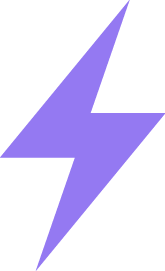

Connected to server at http://public.lightning-viz.org


<IPython.core.display.Javascript object>

/usr/local/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated since IPython 4.0.You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [6]:
from lightning import Lightning
lgn = Lightning(ipython=True, host='http://public.lightning-viz.org')
#lgn = Lightning(ipython=True, local=True)
lgn.histogram(values, 5, zoom=False)

## Tiempos de ejecución

Los tiempos de ejecución son los siguientes:

* **10k:** 11.7s
* **30k:** 14.2s
* **Dataset completo:**  639.2 s